## 决策树（DTS）
是一种非参数监督学习用于方法分类和回归。目标是创建一个模型，通过学习从数据特征推断的简单决策规则来预测目标变量的值。
例如，在下面的示例中，决策树从数据中学习，以一组if-then-else决策规则近似正弦曲线。树越深，决策规则和训练模型越复杂。

### 决策树的一些优点是：
* 简单的理解和解释。树木可视化。
* 需要很少的数据准备。其他技术通常需要数据归一化，需要创建虚拟变量，并删除空值。请注意，此模块不支持缺失值。
* 使用树的成本（即，预测数据）在用于训练树的数据点的数量上是对数的。
* 能够处理数字和分类数据。其他技术通常专门用于分析只有一种变量类型的数据集。有关更多信息，请参阅算法。
* 能够处理多输出问题。
* 使用白盒模型。如果给定的情况在模型中可以观察到，那么条件的解释很容易用布尔逻辑来解释。相比之下，在黑盒子模型（例如，在人造神经网络中），结果可能更难解释。
* 可以使用统计测试验证模型。这样可以说明模型的可靠性。
* 即使其假设被数据生成的真实模型有些违反，表现良好。
### 决策树的缺点包括：
* 决策树学习者可以创建不能很好地推广数据的过于复杂的树。这被称为过拟合。修剪（不支持当前）的机制，设置叶节点所需的最小样本数或设置树的最大深度是避免此问题的必要条件。
* 决策树可能不稳定，因为数据的小变化可能会导致完全不同的树生成。通过使用合奏中的决策树来减轻这个问题。
* 在最优性的几个方面甚至简单的概念中，学习最优决策树的问题已知是NP完整的。因此，实际的决策树学习算法基于启发式算法，例如在每个节点进行局部最优决策的贪心算法。这样的算法不能保证返回全局最优决策树。这可以通过在综合学习者中训练多个树木来缓解，其中特征和样本随机抽样取代。
* 有一些难以学习的概念，因为决策树不能很容易地表达它们，例如XOR，奇偶校验或复用器问题。
* 如果某些类占主导地位，决策树学习者会创造有偏见的树木。因此，建议在拟合之前平衡数据集与决策树。

In [4]:
from sklearn.tree import DecisionTreeClassifier
X = [[0, 0], [1, 1]]
Y = [0, 1]
clf = DecisionTreeClassifier()
clf = clf.fit(X, Y)
clf.predict([[2., 2.]])
clf.predict_proba([[2., 2.]])

array([[ 0.,  1.]])

** DecisionTreeClassifier ** 能够二进制（其中标签是[-1,1]）分类和多类（其中标签是[0，...，K-1]）分类。
使用Iris数据集，我们可以构造一个树，如下所示：

In [7]:
from sklearn import datasets
from sklearn import tree
iris=datasets.load_iris()
clf = clf.fit(iris.data, iris.target)

In [8]:
with open('iris.dot','w') as f:
    f = tree.export_graphviz(clf, out_file=f)

经过训练，我们可以使用导出器以Graphviz格式导出树export_graphviz 。以下是在整个虹膜数据集上训练的树的示例导出：
然后我们可以使用的Graphviz的dot工具来创建一个PDF文件（或任何其他支持的文件类型）： `dot -Tpdf iris.dot -o iris.pdf`

In [10]:
import pydotplus
dot_data = tree.export_graphviz(clf, out_file=None)
graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_pdf("iris_test.pdf")

True

In [11]:
from IPython.display import Image 

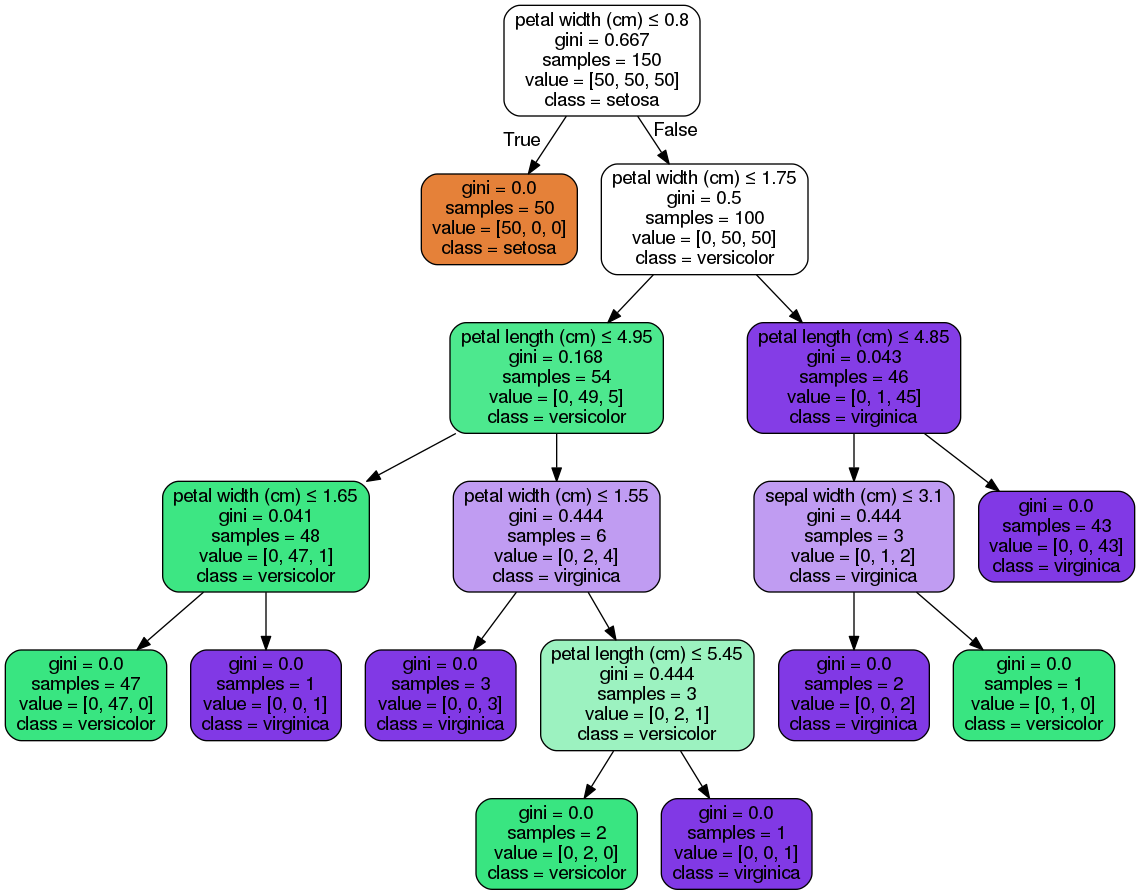

In [12]:
dot_data = tree.export_graphviz(clf, out_file=None,
                         feature_names=iris.feature_names, 
                         class_names=iris.target_names, 
                         filled=True, rounded=True, 
                         special_characters=True) 
graph = pydotplus.graph_from_dot_data(dot_data) 
Image(graph.create_png())

In [13]:
clf.predict(iris.data[:1, :])
clf.predict_proba(iris.data[:1, :])

array([[ 1.,  0.,  0.]])

## 决策树也可以应用于回归问题，使用 DecisionTreeRegressor类。
如在分类设置中，拟合方法将作为参数数组X和y，只有在这种情况下，y预期具有浮点值而不是整数值：

In [14]:
from sklearn import tree
X = [[0, 0], [2, 2]]
y = [0.5, 2.5]
clf = tree.DecisionTreeRegressor()
clf = clf.fit(X, y)
clf.predict([[1, 1]])

array([ 0.5])

## 多输出问题
一种多输出的问题是监督学习问题与若干输出来预测时，即当Y为大小的2D阵列。[n_samples, n_outputs]
当输出之间没有相关性时，解决这种问题的一个非常简单的方法是构建n个独立模型，即每个输出一个，然后使用这些模型来独立地预测n个输出中的每一个。然而，由于可能与相同输入相关的输出值本身相关，所以通常更好的方法是建立一个能够同时预测所有n个输出的单个模型。首先，它需要较少的训练时间，因为只建立了一个估计器。其次，所得到的估计量的泛化精度往往会增加。

<br>
** 关于决策树，这一策略可以很容易地用于支持多输出问题。这需要以下更改：<br> **
* 在叶中存储n个输出值，而不是1;
* 使用分割标准来计算所有n个输出的平均减少量。
<br>
** 该模块通过实现双方这一战略提供了多路输出的问题，支持DecisionTreeClassifier和 DecisionTreeRegressor。如果决策树适合大小的输出数组Y，则所得到的估计器将：[n_samples, n_outputs]**
* 输出n_output值predict
* 输出类概率的n_output数组列表 predict_proba
在多输出决策树回归中演示了使用 多输出树进行回归。在这个例子中，输入X是单个实数值，输出Y是X的正弦和余弦。